# Average and deviation std of the models for the Fidelity (cosine similarity)

In [1]:
import os
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Extract targets and preditions from the folder
def extract_targets_preditions(directory):
    target_tuples = []
    predit_tuples = []
    # Loop through each file in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)       # Construct the full file path
        if os.path.isfile(file_path):                       # Check if it is a file
            result_sim = np.load(file_path, allow_pickle=True)
            target_tuples.extend([(label, array) for label, array in result_sim if 'target' in label])
            predit_tuples.extend([(label, array) for label, array in result_sim if 'prediction' in label])
    return target_tuples, predit_tuples

### Cosine similarity ??????????

This thime we use the Frobenious product to derive the cosine between the two complex matrix
The cosine similarity between matrices \(A\) and \(B\) is given by:

$$
\text{cosine similarity} = \frac{\text{trace}(A^H B)}{\|A\|_F \|B\|_F}
$$

where:
- \(A^H\) is the conjugate transpose of \(A\),
- \(\text{Re}(\cdot)\) denotes taking the real part of the complex number,
- \(\|A\|_F\) and \(\|B\|_F\) are the Frobenius norms of \(A\) and \(B\), respectively.

Real part agle beween the real parts matrices and complex agle beween complex part matrices. We care like decetcor about the absolute value

In [15]:
# Compute Fidelity
def cosine_similarity(target_matrix, predicted_matrix):
    target_matrix_H = target_matrix.conj().T
    predicted_matrix_H = predicted_matrix.conj().T
    trace_tH_t = np.trace(np.dot(target_matrix_H, target_matrix)).real          # result is REAL
    trace_pH_p = np.trace(np.dot(predicted_matrix_H, predicted_matrix)).real    # result is REAL
    trace_pH_t = np.trace(np.dot(predicted_matrix_H, target_matrix))
    cosine_similarity = trace_pH_t/np.sqrt(trace_tH_t*trace_pH_p)
    cosine_similarity = np.abs(cosine_similarity)   # Take the abs 
    return cosine_similarity

In [5]:
def remove_until_underscore(s):     # from the end until the first '_'
    parts = s.split('_')
    result = '_'.join(parts[1:])
    return result

def derive_fidelity(target_tuples, predit_tuples):
    loss = []
    for i in range(len(target_tuples)):
        if remove_until_underscore(target_tuples[i][0]) == remove_until_underscore(predit_tuples[i][0]):
            loss.extend([cosine_similarity(target_tuples[i][1], predit_tuples[i][1])])
        else:
            print("Capo abbiamo un problema :(")

    labels = [t[0] for t in predit_tuples]
    loss_pd = pd.DataFrame({'label': labels, 'value': loss})
    return loss_pd

In [22]:
# MAX value repetition
def models_repmax_mean_devstd(df, name_models):
    # Extracting the base label (e.g., 'LabelA', 'LabelB')
    df['label_no_rep'] = df['label'].apply(lambda x: x.split('_rep')[0])
    # Group with the base label and find min
    min_lastLoss_s = df.groupby('label_no_rep')['value'].max()
    # print(min_lastLoss_s)

    mean_models= []
    std_dev_models =[]
    for name in name_models:
        # take the same model 
        model_s = min_lastLoss_s[min_lastLoss_s.index.str.contains(name)]
        mean_models.append(model_s.mean())
        std_dev_models.append(model_s.std())
    
    return mean_models, std_dev_models

# 24 05 2024 - Outdata

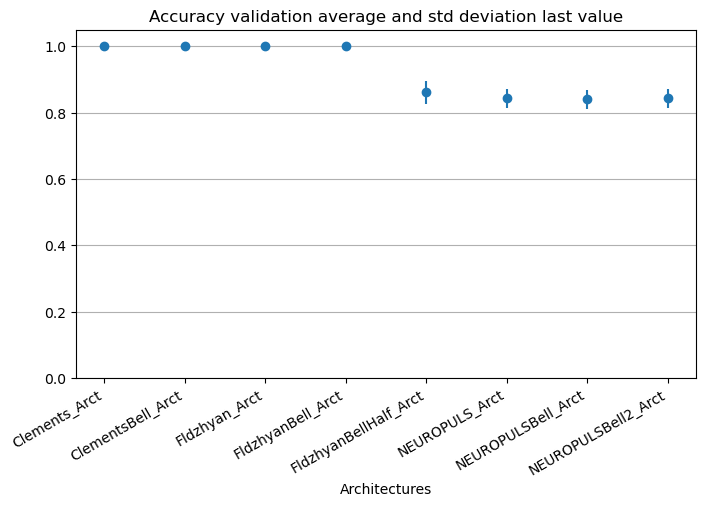

,label,average_value,std_dev_value
0,Clements_Arct,1.000000,4.139427e-07
1,ClementsBell_Arct,1.000000,5.755243e-07
2,Fldzhyan_Arct,0.999982,6.309791e-05
3,FldzhyanBell_Arct,0.999988,4.693604e-05
4,FldzhyanBellHalf_Arct,0.861547,3.578780e-02
5,NEUROPULS_Arct,0.843956,2.875337e-02
6,NEUROPULSBell_Arct,0.840730,2.865609e-02
7,NEUROPULSBell2_Arct,0.843491,2.873499e-02


In [24]:
directory = 'outdata/20240524_run/n8_iloss0.0_imb0.0_HPC_simulation'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell2_Arct']

target_tuples, predit_tuples = extract_targets_preditions(directory)
fidelity_pd = derive_fidelity(target_tuples, predit_tuples)
mean_models, std_dev_models = models_repmax_mean_devstd(fidelity_pd, name_models)

fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 1.05])
plt.grid(axis='y')
# plt.savefig("Test" + ".png", dpi=399)
plt.show();

results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df

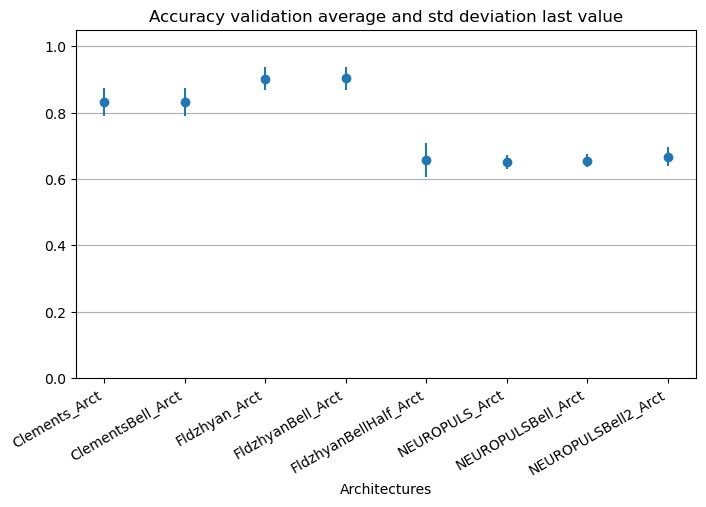

,label,average_value,std_dev_value
0,Clements_Arct,0.831729,0.042139
1,ClementsBell_Arct,0.831735,0.041929
2,Fldzhyan_Arct,0.903252,0.034663
3,FldzhyanBell_Arct,0.903679,0.034406
4,FldzhyanBellHalf_Arct,0.656422,0.051483
5,NEUROPULS_Arct,0.651919,0.020101
6,NEUROPULSBell_Arct,0.655765,0.020520
7,NEUROPULSBell2_Arct,0.667535,0.028524


In [30]:
directory = 'outdata/20240524_run/n8_iloss0.0_imb0.4_HPC_simulation'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell2_Arct']

target_tuples, predit_tuples = extract_targets_preditions(directory)
fidelity_pd = derive_fidelity(target_tuples, predit_tuples)
mean_models, std_dev_models = models_repmax_mean_devstd(fidelity_pd, name_models)

fig = plt.figure(figsize=(8, 6))
plt.errorbar(name_models, mean_models, yerr=std_dev_models, fmt='o')
plt.title("Accuracy validation average and std deviation last value")
fig.autofmt_xdate()
plt.xlabel("Architectures")
fig.subplots_adjust(bottom=0.3)
plt.ylim([0.0, 1.05])
plt.grid(axis='y')
# plt.savefig("Test" + ".png", dpi=399)
plt.show();

results_df = pd.DataFrame({
    'label': name_models,
    'average_value': mean_models,
    'std_dev_value': std_dev_models
})
results_df